# Building a Spam Filter with Naive Bayes

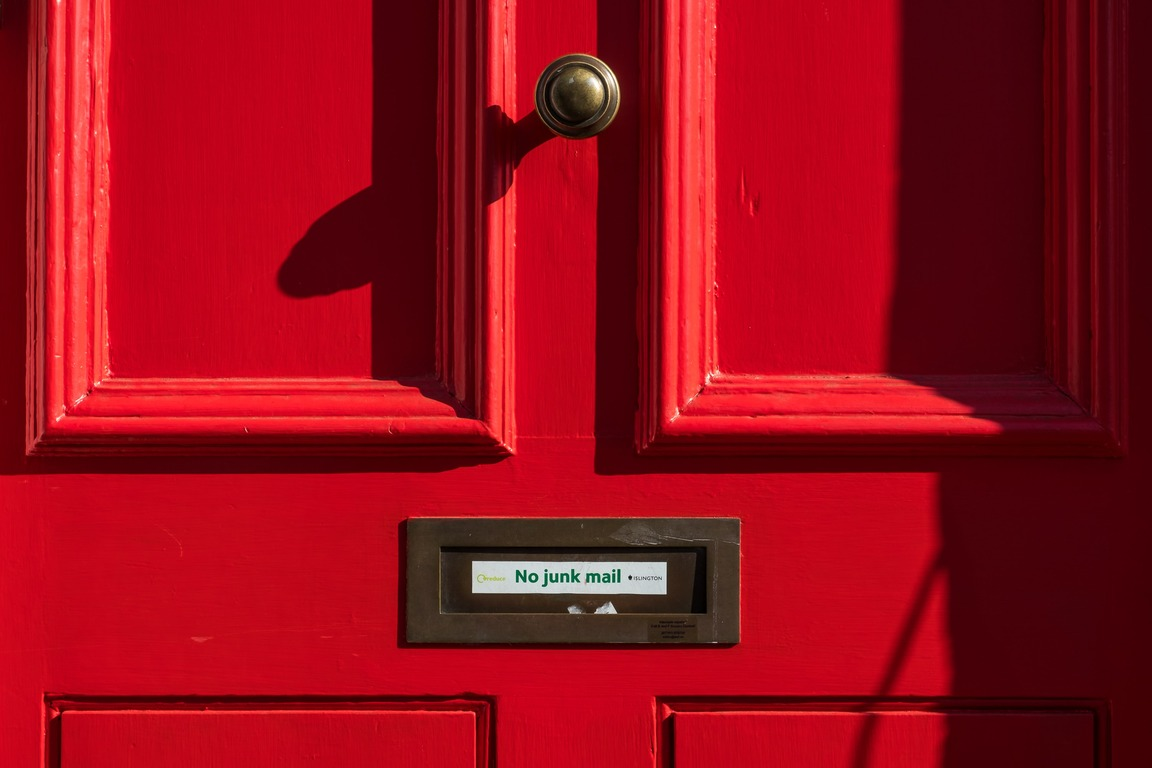

The aim of this project is to build a spam filter for SMS messages using the multinomial Naive Bayes algorithm and a dataset of 5,572 SMS messages that are already classified by humans. The dataset was put together by Tiago A. Almeida and José María Gómez Hidalgo, and it can be downloaded from [this repository](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection). 

To classify messages as spam or non-spam, the computer:

- Learns how humans classify messages.
- Uses that knowledge to estimate probabilities for new messages being spam or non-spam.
- Classifies a new message based on these values: 
     - the probability for spam is greater — spam,
     - the probability for non-spam is greater — non-spam,
     - the two probability values are equal — we may need a human to classify the message.
     
In other words, our task for this project is to "teach" the computer how to classify messages. 
## Exploring the Dataset

Number of SMS messages: 5,572
Number of missing values in the dataframe: 0

Spam vs. ham (non-spam), %
+-------+------+
| Label |  %   |
+-------+------+
|  ham  | 87.0 |
| spam  | 13.0 |
+-------+------+


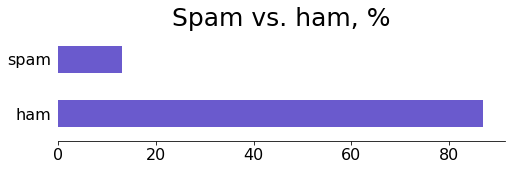

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

sms = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['Label', 'SMS'])
print(f'Number of SMS messages: {sms.shape[0]:,}')
print(f'Number of missing values in the dataframe: {sms.isnull().sum().sum()}\n')
print('Spam vs. ham (non-spam), %')
spam_pct = round(sms['Label'].value_counts(normalize=True)*100, 0)
print(spam_pct.to_markdown(tablefmt='pretty', headers=['Label', '%']))

fig, ax = plt.subplots(figsize=(8,2))
spam_pct.plot.barh(color='slateblue')
ax.set_title('Spam vs. ham, %', fontsize=25)
ax.set_xlabel(None)
ax.tick_params(axis='both', labelsize=16, left=False)
for side in ['top', 'right', 'left']:
    ax.spines[side].set_visible(False)
plt.show()
sms.head()

## Training and Test Set
To start with, we have to put apart a portion of the entire dataset that we'll use at the end to test how well our spam filter classifies new messages. Hence, we have to split our dataset into 2 parts:
- a training set (80% of the dataset, i.e. 4,458 messages), which we'll use to train the computer how to classify messages,
- a test set (20% of the dataset, i.e. 1,114 messages), which we'll use for a final check.

Let's focus on creating a spam filter that classifies new messages with an accuracy greater than 80%. First, we're going to randomize the dataset to ensure that spam and ham messages are spread properly throughout the dataset.

In [20]:
sms_randomized = sms.sample(frac=1, random_state=1)
training_set = sms_randomized[:4458].reset_index(drop=True)
test_set = sms_randomized[4458:].reset_index(drop=True)

print('Spam vs. ham in the training set, %')
spam_train_pct = round(training_set['Label'].value_counts(normalize=True)*100, 0)
print(spam_train_pct.to_markdown(tablefmt='pretty', headers=['Label', '%']), '\n')

print('Spam vs. ham in the test set, %')
spam_test_pct = round(test_set['Label'].value_counts(normalize=True)*100, 0)
print(spam_test_pct.to_markdown(tablefmt='pretty', headers=['Label', '%']))

Spam vs. ham in the training set, %
+-------+------+
| Label |  %   |
+-------+------+
|  ham  | 87.0 |
| spam  | 13.0 |
+-------+------+ 

Spam vs. ham in the test set, %
+-------+------+
| Label |  %   |
+-------+------+
|  ham  | 87.0 |
| spam  | 13.0 |
+-------+------+


## Letter Case and Punctuation


N<sub>wi|Spam</sub>